<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Derive-2D-implicit-(Crank-Nicholson)-heat-transfer-matrix-system" data-toc-modified-id="Derive-2D-implicit-(Crank-Nicholson)-heat-transfer-matrix-system-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Derive 2D implicit (Crank-Nicholson) heat transfer matrix system</a></span><ul class="toc-item"><li><span><a href="#2D-heat-heterogenous-equation" data-toc-modified-id="2D-heat-heterogenous-equation-12.1"><span class="toc-item-num">12.1&nbsp;&nbsp;</span>2D heat heterogenous equation</a></span></li><li><span><a href="#Use-sympy-to-derive-equations" data-toc-modified-id="Use-sympy-to-derive-equations-12.2"><span class="toc-item-num">12.2&nbsp;&nbsp;</span>Use sympy to derive equations</a></span></li><li><span><a href="#Calculate-$q_x-=-\alpha_x-\frac{\partial-T}{\partial-x}$-and-$q_y-=-\alpha_y-\frac{\partial-T}{\partial-y}$" data-toc-modified-id="Calculate-$q_x-=-\alpha_x-\frac{\partial-T}{\partial-x}$-and-$q_y-=-\alpha_y-\frac{\partial-T}{\partial-y}$-12.3"><span class="toc-item-num">12.3&nbsp;&nbsp;</span>Calculate $q_x = \alpha_x \frac{\partial T}{\partial x}$ and $q_y = \alpha_y \frac{\partial T}{\partial y}$</a></span></li><li><span><a href="#Calculate-$\frac{\partial-q_x}{\partial-x}-+-\frac{\partial-q_y}{\partial-y}$" data-toc-modified-id="Calculate-$\frac{\partial-q_x}{\partial-x}-+-\frac{\partial-q_y}{\partial-y}$-12.4"><span class="toc-item-num">12.4&nbsp;&nbsp;</span>Calculate $\frac{\partial q_x}{\partial x} + \frac{\partial q_y}{\partial y}$</a></span></li><li><span><a href="#Crank-Nicholson-Formulation-$\Phi-=-\frac{1}{2}$" data-toc-modified-id="Crank-Nicholson-Formulation-$\Phi-=-\frac{1}{2}$-12.5"><span class="toc-item-num">12.5&nbsp;&nbsp;</span>Crank-Nicholson-Formulation $\Phi = \frac{1}{2}$</a></span></li><li><span><a href="#Insert-$\sigma_x-=-\alpha_x-\frac{\Delta-t}{\Delta-x^{2}}$-and-$\sigma_y-=-\alpha_y-\frac{\Delta-t}{\Delta-y^{2}}$" data-toc-modified-id="Insert-$\sigma_x-=-\alpha_x-\frac{\Delta-t}{\Delta-x^{2}}$-and-$\sigma_y-=-\alpha_y-\frac{\Delta-t}{\Delta-y^{2}}$-12.6"><span class="toc-item-num">12.6&nbsp;&nbsp;</span>Insert $\sigma_x = \alpha_x \frac{\Delta t}{\Delta x^{2}}$ and $\sigma_y = \alpha_y \frac{\Delta t}{\Delta y^{2}}$</a></span></li><li><span><a href="#Create-discrete-variables-of-model-with-$N_x$-and-$N_y$-points" data-toc-modified-id="Create-discrete-variables-of-model-with-$N_x$-and-$N_y$-points-12.7"><span class="toc-item-num">12.7&nbsp;&nbsp;</span>Create discrete variables of model with $N_x$ and $N_y$ points</a></span></li><li><span><a href="#Build-Equations-and-Add-Boundary-Conditions" data-toc-modified-id="Build-Equations-and-Add-Boundary-Conditions-12.8"><span class="toc-item-num">12.8&nbsp;&nbsp;</span>Build Equations and Add Boundary Conditions</a></span></li><li><span><a href="#Build-linear-equation-system-$A-\cdot-x-=-b$" data-toc-modified-id="Build-linear-equation-system-$A-\cdot-x-=-b$-12.9"><span class="toc-item-num">12.9&nbsp;&nbsp;</span>Build linear equation system $A \cdot x = b$</a></span></li></ul></li></ul></div>

# Derive 2D implicit (Crank-Nicholson) heat transfer matrix system

_notebook by Nico Liebers (nico.liebers@dlr.de), Deutsches Zentrum für Luft- und Raumfahrt (DLR), 2020_

    Code under MIT license, all other material under CC-BY-3.0 license
    
Now we transfer the derived 1D solution from [lesson 09](./09%20-%201D%20Heat%20transfer%20(Crank%20Nicholson).ipynb) to calculate the heat transfer via the Crank-Nicholson method into **two dimensions**!

## 2D heat heterogenous equation

$$
\frac{\partial T}{\partial t} = \frac{\partial}{\partial x} 
\left( \alpha_x \frac{\partial T}{\partial x} \right) + \frac{\partial}{\partial y} \left( \alpha_y \frac{\partial T}{\partial y} \right) + s
$$

$$
q_x = \alpha_x \frac{\partial T}{\partial x} 
$$

$$
q_y = \alpha_x \frac{\partial T}{\partial y} 
$$

$$
\frac{\partial T}{\partial t} = \frac{\partial q_x}{\partial x} + \frac{\partial q_y}{\partial y} + s
$$

With the restriction that the main axis of the thermal diffusion of the materials is the same direction as $x$ and $y$ we can use this scheme:

$$
\begin{matrix}
 &   & \bullet &  &   \\
 &  & T_{i, j+1} &  &  \\
 & & \circ  &  &    \\
 & & q_{y, i, j+\frac{1}{2}} & &  \\\
\bullet & \circ  & \bullet & \circ &\bullet   \\
T_{i-1, j} & q_{x, i-\frac{1}{2}, j} & T_{i, j} & q_{x, i+\frac{1}{2}, j} & T_{i+1, j} \\
 & & \circ  &  &    \\
 & & q_{y, i, j-\frac{1}{2}} &  & \\
  &   & \bullet &  &   \\
 &  & T_{i, j-1} &  &  
\end{matrix}
$$

## Use sympy to derive equations

Instead of deriving the equations by hand this time we will use the symbolic math module _sympy_. 

In [1]:
from sympy import *
from sympy_helpers import make_matrix, factor_T, make_discrete_matrix, matrix_2_1dlist
from IPython.display import display
init_printing()

# create the required symbols
dx, dy, dt = symbols(r"dx dy dt")
Phi = symbols(r"\Phi")

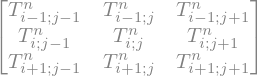

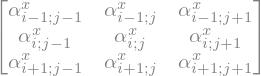

In [2]:
T_now = make_matrix("T^{n}")
T_next = make_matrix("T^{n+1}")
alpha_x = make_matrix(r"\alpha^{x}")
alpha_y = make_matrix(r"\alpha^{y}")
sigma_x = make_matrix(r"\sigma^{x}")
sigma_y = make_matrix(r"\sigma^{y}")
display(T_now)
display(alpha_x)

## Calculate $q_x = \alpha_x \frac{\partial T}{\partial x}$ and $q_y = \alpha_y \frac{\partial T}{\partial y}$

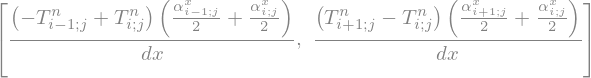

In [3]:
# use arithmetic averaging
alpha_x_avg = [(alpha_x[ii+1, 1] + alpha_x[ii, 1])/2 for ii in range(2)]
alpha_y_avg = [(alpha_y[1, jj+1] + alpha_y[1, jj])/2 for jj in range(2)]

q_x_now = [(T_now[ii+1, 1] - T_now[ii, 1])/dx * alpha_x_avg[ii] for ii in range(2)]
q_y_now = [(T_now[1, jj+1] - T_now[1, jj])/dy * alpha_y_avg[jj] for jj in range(2)]
q_x_now

## Calculate $\frac{\partial q_x}{\partial x} + \frac{\partial q_y}{\partial y}$

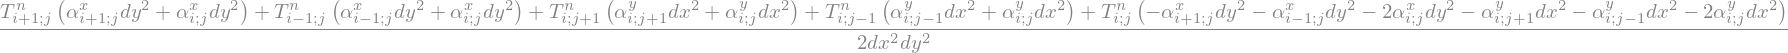

In [4]:
dqdxdy_now = (q_x_now[1] - q_x_now[0])/dx + (q_y_now[1] - q_y_now[0])/dy
dqdxdy_now = factor_T(dqdxdy_now, T_now, T_next)
dqdxdy_now

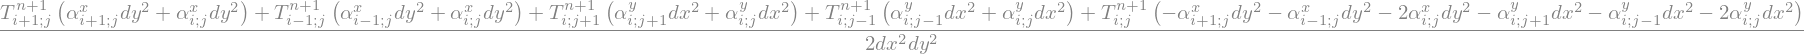

In [5]:
dqdxdy_next = dqdxdy_now.copy()
for _t_now, _t_next in zip(T_now, T_next):
    dqdxdy_next = dqdxdy_next.subs(_t_now, _t_next)
dqdxdy_next

## Crank-Nicholson-Formulation $\Phi = \frac{1}{2}$

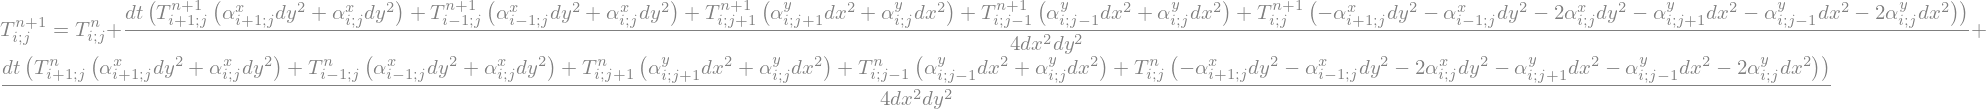

In [6]:
target_eq = Eq(T_next[1, 1], T_now[1, 1] + (dqdxdy_next)*dt / 2 + (dqdxdy_now)*dt / 2)
target_eq

## Insert $\sigma_x = \alpha_x \frac{\Delta t}{\Delta x^{2}}$ and $\sigma_y = \alpha_y \frac{\Delta t}{\Delta y^{2}}$

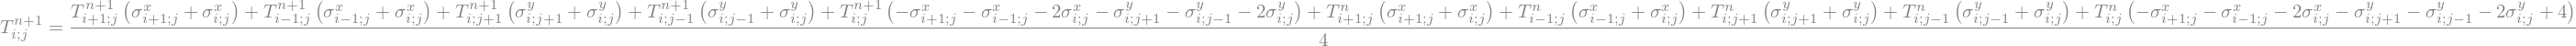

In [7]:
for ii in range(3):
    for jj in range(3):
        target_eq = target_eq.expand().subs(dt*alpha_x[ii, jj]/dx**2, sigma_x[ii, jj])
        target_eq = target_eq.expand().subs(dt*alpha_y[ii, jj]/dy**2, sigma_y[ii, jj])
rhs = factor_T(target_eq.rhs, T_now, T_next)
target_eq = Eq(target_eq.lhs, rhs)
target_eq

## Create discrete variables of model with $N_x$ and $N_y$ points

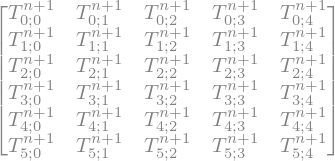

In [8]:
Nx = 6
Ny = 5

T_now_discreet = make_discrete_matrix("T^n", Nx, Ny)
T_next_discreet = make_discrete_matrix("T^{n+1}", Nx, Ny)
sigma_x_discreet = make_discrete_matrix(r"\sigma^x", Nx, Ny)
sigma_y_discreet = make_discrete_matrix(r"\sigma^y", Nx, Ny)

T_next_discreet

## Build Equations and Add Boundary Conditions

Left and lower boundary: $T_{0, j}$, and $T_{i, 0}$ are known -> No modification needed. 

Right boundary: No flux, so $T_{N_x-2, j} = T_{N_x-1, j}$ and $T_{i, N_y-2} = T_{i, N_y-1}$



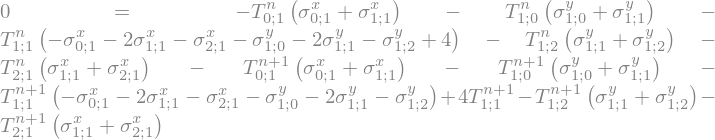

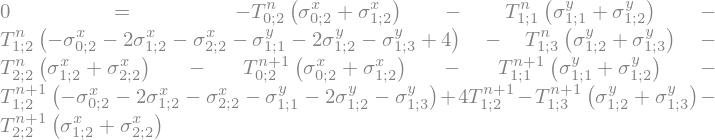

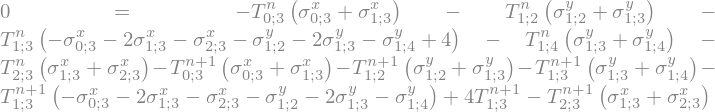

In [9]:
eqs = []
x = []
x2 = []
for ii in range(Nx-2):
    for jj in range(Ny-2):    
        x.append(T_next_discreet[ii+1, jj+1])
        x2.append(T_now_discreet[ii+1, jj+1])
        _eq = target_eq.lhs - target_eq.rhs
        _eq
        # replace variables by discreet model variables    
        replacelist = list(zip(matrix_2_1dlist(T_next), matrix_2_1dlist(T_next_discreet[ii:ii+3, jj:jj+3])))
        replacelist += list(zip(matrix_2_1dlist(T_now), matrix_2_1dlist(T_now_discreet[ii:ii+3, jj:jj+3])))
        replacelist += list(zip(matrix_2_1dlist(sigma_x), matrix_2_1dlist(sigma_x_discreet[ii:ii+3, jj:jj+3])))    
        replacelist += list(zip(matrix_2_1dlist(sigma_y), matrix_2_1dlist(sigma_y_discreet[ii:ii+3, jj:jj+3])))    
        _eq = _eq.subs(replacelist)    
        # manual simplification
        _eq *= 4
        # add von Neumann boundary conditions
        if ii == Nx-3:
            _eq = _eq.subs(zip(T_next_discreet[ii+2, :], T_next_discreet[ii+1, :]))
        if jj == Ny-3:
            _eq = _eq.subs(zip(T_next_discreet[:, jj+2], T_next_discreet[:, jj+1]))
        eqs.append(_eq)

[display(Eq(0, _eq)) for _eq in eqs[:3]];

## Build linear equation system $A \cdot x = b$ 

With $x = T^{n+1} = [T^{n+1}_{1}, T^{n+1}_{2} \cdots T^{n+1}_{i} \cdots T^{n+1}_{N_x-2}]^T$

Right hand side vector $b$ can be also expressed as Matrix multiplication:

$b = A_2 \cdot T^n + b_{BC}$ 

Where $A$ and $A_2$ for the Crank-Nicholson are very simular. $b_{BC}$ respresents the Dirichlet Boundary conditions. 

So the final linear system of equations looks like this and has to solved for $T^{n+1}$:

$$ A \cdot T^{n+1} = A_2 \cdot T^n + b_{BC} $$

In [10]:
x

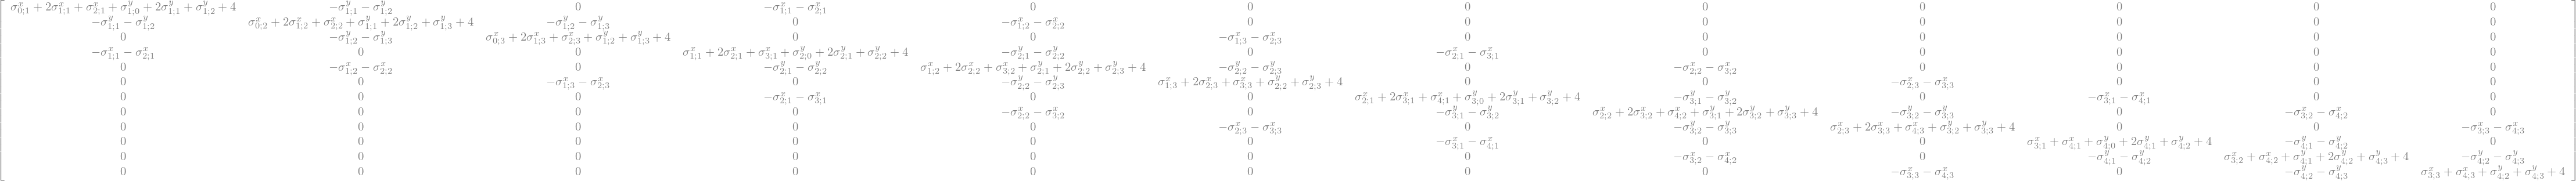

In [11]:
A, b = linear_eq_to_matrix(eqs, x)
A = A.applyfunc(simplify)
A

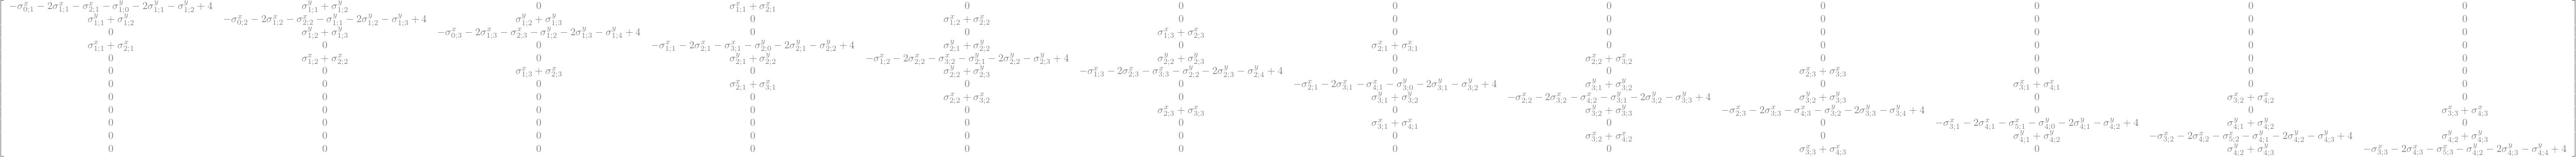

In [12]:
A2, b2 = linear_eq_to_matrix(b, x2)
A2 = A2.applyfunc(simplify)
A2

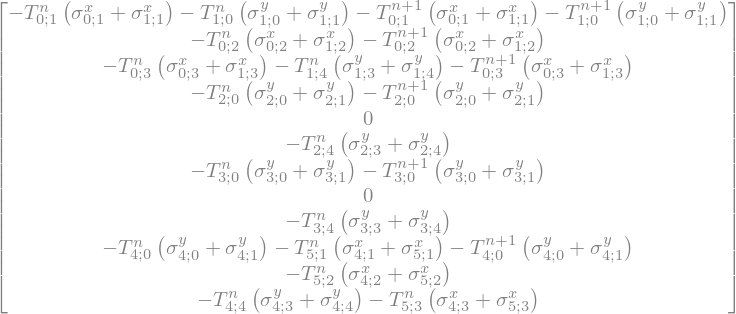

In [13]:
b2